# HW

## Submitted by: Tomer Yannay 315698720

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image,ImageDraw
import json
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
import random

### Read file Hananya1

In [2]:
hananya1 = pd.read_csv('Hananya1.csv')
display(hananya1.head())

Y       X  scale  angle  feature1  feature2  feature3  feature4  \
0  191.63  281.10  20.79  1.545        65         7         0         0   
1  195.73   41.28   6.35  1.458        52        12         0         0   
2  196.50  150.37   9.14  1.441        60        15         1         1   
3  198.02   23.67   1.93  1.870        72         9         0         0   
4  198.24   24.35   1.71  1.845        80        20         0         0   

   feature5  feature6  ...  feature119  feature120  feature121  feature122  \
0         0         0  ...           0           7           0           0   
1        12         4  ...           1          18           0           0   
2         2         6  ...           0           1           7           0   
3         1         2  ...          23          48           7           0   
4         0         0  ...          26          53           9           1   

   feature123  feature124  feature125  feature126  feature127  feature128  
0           0           0           1           1           0           0  
1           0           0           0           0           5           0  
2           0           0           0           0           0           2  
3           0           0           0           0           1          10  
4           0           0           0           0           0          15  

[5 rows x 132 columns]

### Read file Hananya2

In [3]:
hananya2 = pd.read_csv('Hananya2.csv')
display(hananya2.head())

Y       X  scale  angle  feature1  feature2  feature3  feature4  \
0  193.17  371.13  22.83  1.571        46        13         0         0   
1  331.15  543.32  18.86  1.099        15       105        32         1   
2  253.43  525.48  21.01  1.512        47        67         0         0   
3  236.15  239.20  21.35  1.502        11         6         0         0   
4  201.21  471.74  19.79  1.411        78        31         0         0   

   feature5  feature6  ...  feature119  feature120  feature121  feature122  \
0         0         0  ...           0          24           0           0   
1         0         0  ...           0           0           1          12   
2         0         0  ...           0           5          50           7   
3         0         0  ...           0          39          87           3   
4         0         0  ...           0           0           0           1   

   feature123  feature124  feature125  feature126  feature127  feature128  
0           0          10           3           0           0           0  
1           2           0           0           0           0           0  
2           2           3           0           0           0           0  
3           0           0           0           0           0          10  
4           2          17           0           0           0           0  

[5 rows x 132 columns]

### Read file Hashmal1


In [4]:
hashmal1 = pd.read_csv('Hashmal1.csv')
display(hashmal1.head())

Y       X  scale  angle  feature1  feature2  feature3  feature4  \
0   97.98  205.87  50.23 -0.892         0         0         0         0   
1  419.59  307.25  38.35  0.496        55        96        93        11   
2  365.73  214.72  30.41  1.751         4         4         4         0   
3  365.73  214.72  30.41  0.084        24         3        14         7   
4  242.05  492.58  29.99  1.567        13        55       118        40   

   feature5  feature6  ...  feature119  feature120  feature121  feature122  \
0         0         0  ...           0          39           0          14   
1         8         3  ...          36         104          22           7   
2         0         3  ...           8          26          55          36   
3         3         7  ...           0           8          18          28   
4         2         5  ...          16          52         118          29   

   feature123  feature124  feature125  feature126  feature127  feature128  
0          89          83          79          35           1           0  
1          11           8           6          47          31          29  
2           3           0          21          22           0          10  
3           9          76          63           0           0           2  
4          19          60          69          12           8          73  

[5 rows x 132 columns]

### Read file Hashmal2

In [5]:
hashmal2 = pd.read_csv('Hashmal2.csv')
display(hashmal2.head())

Y       X  scale  angle  feature1  feature2  feature3  feature4  \
0  267.58  164.27  64.36 -1.334        19        12         9         0   
1  507.45  691.63  25.51  3.089         0         0         0         0   
2  507.45  691.63  25.51 -1.840         0         0         0         1   
3  524.45  145.16  18.51  2.897         0         0         0         0   
4  357.54  237.91  18.61  1.550        45        25        12        15   

   feature5  feature6  ...  feature119  feature120  feature121  feature122  \
0         0         6  ...           0           0           0           2   
1         0         0  ...         100          63          12          11   
2         0         0  ...           8          11          44          41   
3         0         0  ...         100          47           6          15   
4        41        35  ...           6          51          39          39   

   feature123  feature124  feature125  feature126  feature127  feature128  
0           0           0           0           0           0           0  
1          10          15          58          20          35          35  
2           0           0           2           0           0           0  
3          31          44          24           7           6           3  
4          19          14          19          16           4          14  

[5 rows x 132 columns]

# 

# Part A

## 1. KNN Class

### Implementation of k-nearest neighbors algorithm

Class methods are:<br>
**\_init_ -**<br>
The constructor receives and initializes a dataset and a set of observations, parameter k_neighbors (number of neighbours)
<br><br>
**kneighbors -** <br>
Returns list with nearest neighbors and their distances
<br><br>


In [6]:
class knn:
    def __init__(self,dataset,observations,k_neighbors):
        self.start = int(round(time.time()))
        if(k_neighbors is None):
            self.k_neighbors = 2
        else:
            self.k_neighbors = k_neighbors
        self.dataset = dataset
        self.observations = observations
        self.runtime = None
        
    def kneighbors(self):
        dic = {}
        list_of_neighbors = {}
        knn_table = []
        X = self.dataset.iloc[:,4:]
        X = X.to_numpy()
        for row in range(len(self.observations)):
            lst = []
            sample = self.observations.iloc[row][4:].to_numpy()
            label = list(self.observations.iloc[row][:4])
            i = 0
            for arr in X:
                # find the distance using euclidian distance and norm of the vector
                diff = np.linalg.norm(np.array(arr)-np.array(sample))
                dic[i] = diff
                i = i + 1
            sorted_x = sorted(dic.items(), key=lambda kv: kv[1])
            for item in sorted_x[:self.k_neighbors]:
                y = list(self.dataset.iloc[item[0]][:4])
                list_of_neighbors[str(label)] = (str(y),item[1])
        end = int(round(time.time()))
        self.runtime = end - self.start
        return list_of_neighbors


## 2. ANN Class - Implemention of LSH algorithm 

Class methods are:<br>
**\_init_ -**<br>
The Constructor initializes training set and parameters such as num. of neighbors (k_neighbors) , num. of cuts (K) and num. of hash tables (L)
<br><br>
**contents -** <br>
Gets training set and creates its copy
<br><br>
**fit -** <br>
Gets sets of features and labels to create data structure
<br><br>
**kneighbors -** <br>
Gets dataset of samples and returns dictionary with nearest neighbors and their distances
<br><br>
**neighbors_distance -** <br>
Calculates distance between sample and neighbors
<br><br>
**complete_neighbors -** <br>
This method get call when there's lack of neighbors. it aims to complete neighbors from nearest cuts
<br><br>
**relating_method -** <br>
Returns distance and nearest neighbor between the two when the ratio < 0.8 

In [7]:
class ann:
     
    def __init__(self,training_set,k_neighbors,K,L): 
        self.start = int(round(time.time()))
        if(k_neighbors is None):
            self.k_neighbors = 2
        else:
            self.k_neighbors = k_neighbors
        self.training_set = training_set
        self.K = K
        self.L = L
        self.bucket = {}
        self.plane_norms = np.random.rand(self.K,128) - .5
        self.X = training_set.iloc[:,4:]
        self.y = training_set.iloc[:,:4]
        self.table = self.contents(training_set)
        self.runtime = None
    
    def contents(self,training_set):
        table = {}
        for row in training_set.index:
            y = str(list(training_set.iloc[row,:4]))
            x = training_set.iloc[row,4:]
            table[y] = x
        return table
        
    def fit(self,X,y):
        for row in self.training_set.index:
            a = np.asarray(self.X.iloc[row,:])
            a_dot = np.dot(a,self.plane_norms.T)
            a_dot = a_dot > 0
            hash_key = list(a_dot.astype(int))
            key = ''
            for bit in hash_key:
                key += str(bit)
            if key not in self.bucket:
                self.bucket[key] = list()
            self.bucket[key].append(list(self.y.iloc[row,:]))
    
    def kneighbors(self,dataset):
        rows = len(dataset)
        k_neighbors_dict = {}
        for row in range (rows):
            sample = dataset.iloc[row][4:]
            label = dataset.iloc[row][:4]
            neighbors = []
            
            #attach hash key to sample
            a = np.asarray(sample)
            a_dot = np.dot(a,self.plane_norms.T)
            a_dot = a_dot > 0
            hash_key = list(a_dot.astype(int))
            sample_key = ''
            for bit in hash_key:
                sample_key += str(bit)
            try:
                neighbors_size = len(self.bucket[sample_key])
            except:
                neighbors_size = 0

            if(neighbors_size < self.k_neighbors):
                another_neighbors = self.complete_neighbors(sample_key, self.k_neighbors - neighbors_size)
                try:
                    neighbors = self.bucket[sample_key] + another_neighbors
                except:
                    neighbors = another_neighbors
            else:
                neighbors = self.bucket[sample_key]
                    
            dis = self.neighbors_distance(sample,neighbors)                
            k_neighbors_dict[str(list(label))] = dis[:self.k_neighbors]
            end = int(round(time.time()))
            self.runtime = end - self.start
        return k_neighbors_dict           
    
    def neighbors_distance(self,sample,neighbors):
        distances = {}
        for neighbor in neighbors:
            features = self.table[str(neighbor)]
            # find the distance using euclidian distance and norm of the vector
            dis = np.linalg.norm(np.array(sample)-np.array(features))
            distances[str(neighbor)] = dis
        return sorted(distances.items(), key=lambda kv: kv[1])            
                
    def complete_neighbors(self,key, diff):
        key = str(key)
        original_key = key
        neighbors = {}
        index = self.K - 1
        count = 0
        diff_neighbors = []
        
        while(count < diff and index > -1):
            key = original_key
            binary = key[index]
            if(binary == '0'):
                new = list(key)
                new[index] = '1'
                key = ''.join(new)
            else:
                new = list(key)
                new[index] = '0'
                key = ''.join(new)
            if(key in self.bucket.keys()):
                neighbors[key] = list(self.bucket[key])
            try:
                count = count + len(neighbors[key])
            except:
                count = count
            index = index - 1
        count = 0
        for k in neighbors.keys():
            for value in neighbors[k]:
                diff_neighbors.append(value)
                count = count + 1
                if(count == diff):
                    return diff_neighbors
        return diff_neighbors
    
    def relating_method(self,neighbors_table):
        dictionary = {}
        for sample in neighbors_table:
            try:
                neighbors = neighbors_table[sample]
                nearest_neighbor = neighbors[0]
                second_nearest_neighbor = neighbors[1]
                dis1 = nearest_neighbor[1]
                dis2 = second_nearest_neighbor[1]
                ratio = dis1 / dis2 
                if(ratio < 0.8):
                    dictionary[sample] = nearest_neighbor
                else:
                    dictionary[sample] = None
            except:
                dictionary[sample] = None
        return dictionary
            

# 

# Part B

## 3. Run KNN (k=1)

In [8]:
# for hananya datasets
hananya_knn = knn(hananya1,hananya2,1)
hananya_knn_results = hananya_knn.kneighbors();

In [9]:
# for hashmal datasets
hashmal_knn = knn(hashmal1,hashmal2,1)
hashmal_knn_results = hashmal_knn.kneighbors();

### KNN Results (k=1)

#### Hananya KNN (k=1) results

In [10]:
display(hananya_knn_results)

{'[193.17, 371.13, 22.83, 1.571]': ('[201.45, 383.78, 15.63, 1.636]',
  124.2014492669067),
 '[331.15, 543.32, 18.86, 1.099]': ('[235.13, 331.52, 7.26, 1.358]',
  347.77722754660056),
 '[253.43, 525.48, 21.01, 1.512]': ('[207.54, 141.9, 1.27, 1.393]',
  197.56770991232347),
 '[236.15, 239.2, 21.35, 1.502]': ('[207.54, 141.9, 1.27, 1.393]',
  149.0570360633808),
 '[201.21, 471.74, 19.79, 1.411]': ('[201.5, 41.66, 1.2, 1.451]',
  117.81341180018512),
 '[337.09, 417.0, 11.87, 2.015]': ('[228.83, 546.87, 2.49, 1.848]',
  239.00627606822377),
 '[225.51, 328.02, 13.1, 1.395]': ('[251.53, 491.94, 20.21, 1.439]',
  197.40820651634522),
 '[215.02, 536.9, 13.25, 1.519]': ('[204.29, 139.96, 1.43, 1.321]',
  100.12492197250393),
 '[331.65, 29.64, 9.09, 1.421]': ('[219.67, 451.59, 8.09, 1.671]',
  346.48520891951506),
 '[331.65, 29.64, 9.09, 0.401]': ('[207.53, 70.63, 2.97, 1.088]',
  322.7847580044634),
 '[286.95, 426.91, 9.6, 1.749]': ('[368.9, 528.32, 0.98, -1.471]',
  351.2605870290602),
 '[286

#### Hashmal KNN (k=1) results

In [11]:
display(hashmal_knn_results)

{'[267.58, 164.27, 64.36, -1.334]': ('[415.29, 2.85, 1.14, 0.171]',
  272.20947815974375),
 '[507.45, 691.63, 25.51, 3.089]': ('[347.43, 58.75, 1.04, 0.622]',
  408.2866639996952),
 '[507.45, 691.63, 25.51, -1.84]': ('[505.37, 649.38, 20.04, -1.736]',
  399.7724352678659),
 '[524.45, 145.16, 18.51, 2.897]': ('[355.37, 620.27, 1.04, 2.682]',
  350.3469708731617),
 '[357.54, 237.91, 18.61, 1.55]': ('[327.93, 63.4, 1.02, 2.986]',
  276.60441066620757),
 '[93.72, 248.68, 19.85, -1.421]': ('[203.76, 127.96, 2.15, 1.565]',
  279.97142711355383),
 '[69.51, 577.74, 20.8, 1.556]': ('[563.08, 698.18, 1.24, -3.095]',
  273.9689763458629),
 '[69.51, 577.74, 20.8, -1.557]': ('[81.61, 278.56, 18.99, -1.483]',
  243.36803405541986),
 '[447.74, 531.18, 17.06, -1.341]': ('[110.56, 606.43, 1.15, 1.542]',
  328.26665989710256),
 '[448.18, 489.1, 16.23, 1.941]': ('[187.99, 597.9, 2.71, 1.648]',
  328.09754647055803),
 '[448.18, 489.1, 16.23, -1.908]': ('[185.57, 704.83, 4.13, -1.706]',
  358.4494385544494

### Grid Search method
#### The function finds the best hyperparameters based on sets of 10 K and 10 L parameters

In [12]:
def grid_search(dataset1,dataset2,knn_results):
    K = [2,3,4,5,6,7,8,9,10,12]
    L = [2,4,8,10,16,24,32,48,64,72]
    kneighbors = 1
    min_err = False
    knn_table = knn_results
    N = len(knn_table)
    errors = []
    hyperparameters = {}
    for k in K:
        for l in L:
            start = int(round(time.time()))
            a = ann(dataset1,kneighbors,k,l)
            a.fit(a.X,a.y)
            ann_table = a.kneighbors(dataset2)
            count_none = 0
            sum_dis = 0
            for key in ann_table.keys():
                dknn = knn_table[key][1]
                try:
                    dann = ann_table[key][0][1]
                except:
                    count_none += 1
                    dann = dknn
                sum_dis += (dann / dknn) -1
                
            avg = 0
            if(count_none >0 and count_none < N):
                avg = sum_dis / (N - count_none)
                avg = avg * count_none
            err = 1/N * (sum_dis+avg)
            errors.append(err)
            if(err < min_err or min_err == False):
                min_err = err
                save_l = l
                save_k = k
            end = int(round(time.time()))
            item = {'time run' : end-start, 'error' : err}
            hyperparameters[str((k,l))] = item
            
    # create a JSON file with time stamps and errors  for each pair of hyperparameters
    json_object = json.dumps(hyperparameters, indent=4)
    
    # give the name to JSON according to 1st dataset in the pair -hananya, hashmal or other
    if(len(dataset1) == len(hananya1)):
        with open('Hananya_gridSearch.json', "w") as outfile:
            outfile.write(json_object)
    elif(len(dataset1) == len(hashmal1)):
        with open('Hashmal_gridSearch.json', "w") as outfile:
            outfile.write(json_object)
    else:
        with open('gridSearch.json', "w") as outfile:
            outfile.write(json_object)
            
    display('best L parm - ',save_l)
    display('best K parm - ',save_k)
    display('min err - ', min_err)
    # display('list of errors - ', errors)
    return (save_k,save_l)

# 

# Part C

## 4. Training ANN model

### Run grid_search() to find K and L values for lowest error

In [13]:
# for hananya dataset
res_hananya = grid_search(hananya1,hananya2,hananya_knn_results)

'best L parm - '

48

'best K parm - '

2

'min err - '

0.02088546177625442

In [14]:
# # for hashmal dataset
# res_hashmal = grid_search(hashmal1,hashmal2,hashmal_knn_results)
# display(res_hashmal)

### After a few grid searches, we can deside on K, L values for optimal results.

K defines the number of hash functions used to generate the hash code for each point. L is the number of buckets in which the data points are partitioned.

If we increase L, then we'll use more buckets, which might reduce the probability of collisions when different points are hashed to the same bucket. If we increase K, it should improve the accuracy of the algorithm by reducing the probability of false positives when points that are not close are hashed to the same bucket. 

However, an increase of L, meaning more buckets, results in more space and time complexity. Moreover, higher K also increases the time complexity of the algorithm. 

Therefore, the values of K and L should be chosen based on the trade-off between accuracy and efficiency and also based on the data size.

We had performed a few grid searches for both Hananya and Hashmal datasets, each time we received L in the range of 8-32, and K in the range of 2-3. 

Based on the accuracy and time efficiency and also after a few tries of different combinations of K and L and we've chosen the values to be K=2, L=10 in order to get the best result and performance.

In [15]:
# define K, L values in order to receive optimal results
K = res_hananya[0]
L = res_hananya[1]

## 5a. Run ANN LSH (k=2, optimal K , optimal L)

In [16]:
# for hananya datasets
hananya_ann = ann(hananya1,2,K,L)
hananya_ann.fit(hananya_ann.X,hananya_ann.y)
hananya_ann_results = hananya_ann.kneighbors(hananya2)

In [17]:
# for hashmal datasets
hashmal_ann = ann(hashmal1,2,K,L)
hashmal_ann.fit(hashmal_ann.X,hashmal_ann.y)
hashmal_ann_results = hashmal_ann.kneighbors(hashmal2)

## 5b. Run ANN model by ratio method (k=2)

As we've explained early the chosen values are K=2, L=10 in order to get optimal result and performance.

In [18]:
# for hananya datasets
hananya_ann_neighbors = hananya_ann.relating_method(hananya_ann_results)

In [19]:
# for hashmal datasets
hashmal_ann_neighbors = hashmal_ann.relating_method(hashmal_ann_results)

## 5c. Find top 10 neighbors

#### This function receives urls of two pictures, finds 10 pairs of similiar points, marks them on both pictures, returns 2 images with markings 

In [20]:
def images(url_jpg1,url_jpg2,ann_neighbors):
    
    img1 = Image.open(url_jpg1)
    img2 = Image.open(url_jpg2)
    distances = {}
    ind = 0

    for key in ann_neighbors.keys():
        if(ann_neighbors[key] != None):
            distances[key] = ann_neighbors[key]

    sort_tuples = sorted(distances.values(), key=lambda kv: kv[1])
    sort_tuples = sort_tuples[:10]
    # choose 10 pairs of points with best distances
    best_ten_dis = {}
    for key in ann_neighbors.keys():
        for item in sort_tuples:
            if(ann_neighbors[key] == item):
                best_ten_dis[key] = item
                break
    # 10 colors to mark each one of matching pairs
    colors = ['lime', 'red', 'blue', 'darkorange', 'purple', 'deeppink', 'gold', 'green', 'brown', 'white']
    draw1 = ImageDraw.Draw(img1)
    draw2 = ImageDraw.Draw(img2)
    i = 0
    for key in best_ten_dis.keys():
        value = best_ten_dis[key][0]
        point1 = value.strip('][').split(', ')
        point2 = key.strip('][').split(', ')
        
        # define the coordinates of points elements
        y1 = float(point1[0])
        x1 = float(point1[1])
        # define scale, so the markings of points would be possible
        scale1 = 15
        angle1 = float(point1[3])

        y2 = float(point2[0])
        x2 = float(point2[1])
        scale2 = 15
        angle2 = float(point2[3])
        
        # mark the points on the pictures
        draw1.ellipse((x1-scale1/2,y1-scale1/2,x1+scale1/2,y1+scale1/2),fill=colors[i])
        draw2.ellipse((x2-scale2/2,y2-scale2/2,x2+scale2/2,y2+scale2/2),fill=colors[i])
        i = i + 1
    return img1,img2

In [21]:
# receive two images with markings for hananya datasets
hananya_img1,hananya_img2 = images('Hananya1.jpg','Hananya2.jpg',hananya_ann_neighbors)

In [22]:
# receive two images with markings for hashmal datasets
hashmal_img1,hashmal_img2 = images('Hashmal1.jpg','Hashmal2.jpg',hashmal_ann_neighbors)

### Hananya1 image with marked points

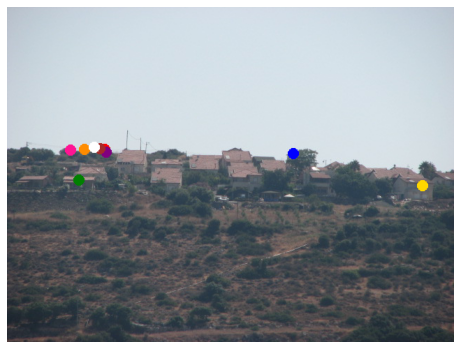

In [23]:
# display first image Hananya1 with markings
# display(hananya_img1)
plt.figure(figsize=(8, 8))
plt.imshow(hananya_img1)
plt.axis('off')
plt.show()


### Hananya2  image with marked points

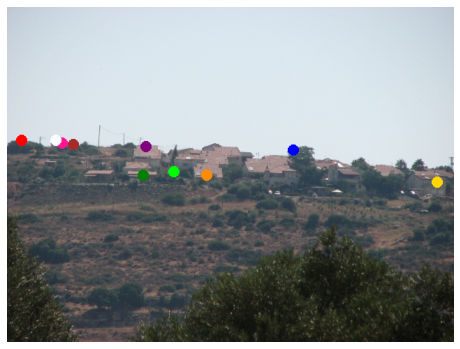

In [24]:
# display second image Hananya2 with markings
# display(hananya_img2)
plt.figure(figsize=(8, 8))
plt.imshow(hananya_img2)
plt.axis('off')
plt.show()

### Hashmal1  image with marked points

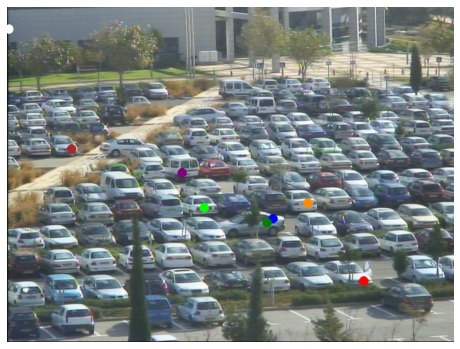

In [25]:
# display first image Hashmal1 with markings
# display(hashmal_img1)

plt.figure(figsize=(8, 8))
plt.imshow(hashmal_img1)
plt.axis('off')
plt.show()

### Hashmal2  image with marked points

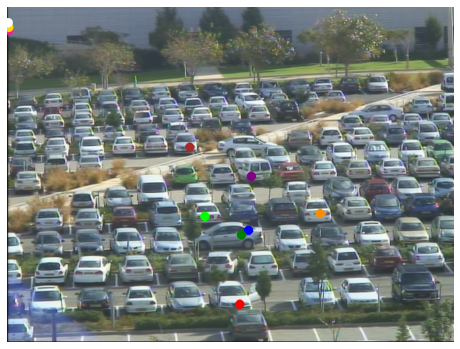

In [26]:
# display seconds image Hashmal2 with markings
# display(hashmal_img2)
plt.figure(figsize=(8, 8))
plt.imshow(hashmal_img2)
plt.axis('off')
plt.show()

## Conclusions
#### We can see that many of points matched between two images (both Hananya and Hashmal). We may divide all points into two groups:
1. The similar points on both  images.
2. The unrelated points and we can explain why the mistake could occure:
- due to the noise or blur, distortions: usually these points lie in similar parts on pictures
- due to the similarity of images' areas, similar colors. For example, points which are placed on the edge of horizon line or some other kind of line (white paint lines on the road or electric pole, or dark edge of the picture as in the left upper corner in Hashmal2) share common faetures and could be easily mistaken. It usuallly results in total mismatch, these pairs of points appear in different areas on images.

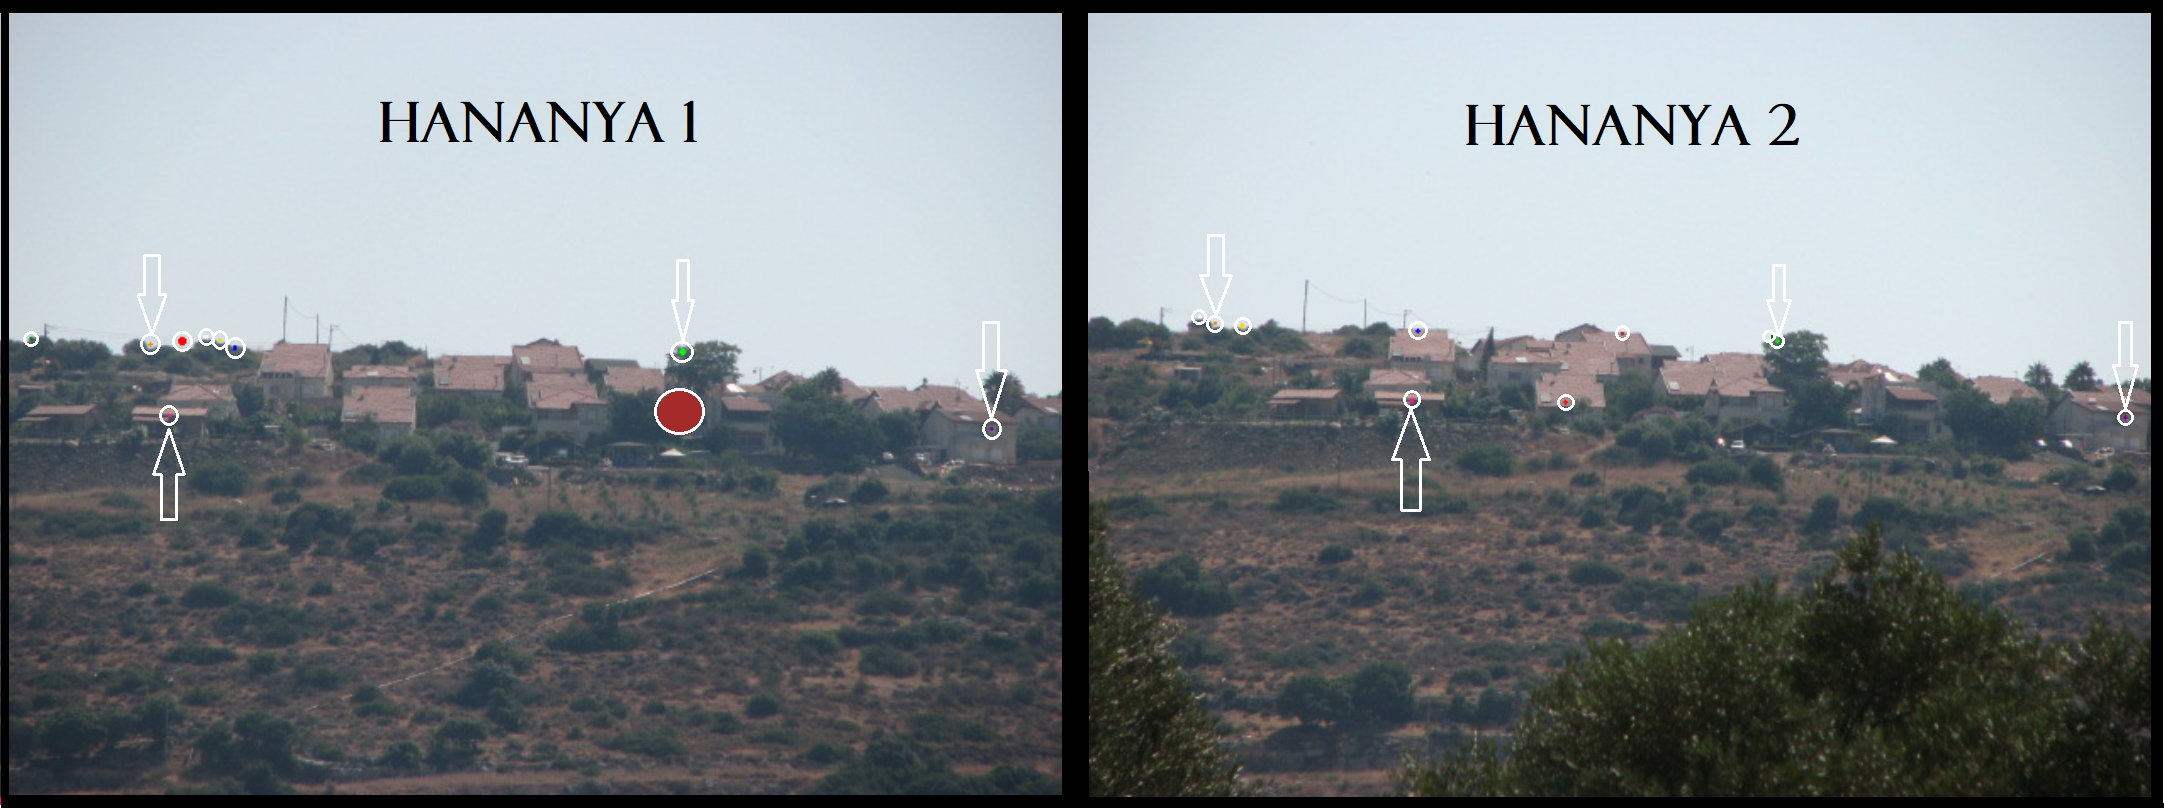

In [27]:
from IPython import display
display.Image('img3.png')

We can  easily recognize 4 similar points, a few more are in the same ares on the images. Most of the mistakes are located on the horizon line. We can assume that  these points share common features being located on the edge of the horizon line, Also, when we marked points on these two images we used scale parameter as it is given in the dataset for each point. Therefore, the markings of points differ,the big brown circle on the first image shows the point located on the crown of tree (all points in this area shares  similar chacteristics), iits scale is much bigger than other points, that's why the circle is so big. Later, we use same scale value for all points in order to recognize points easier. 

## 6a. Run Time Visualization

### Hananya


In [28]:
# Hananya, receive results for visualization
ann_hananya_k1 = ann(hananya1,1,K,L)
ann_hananya_k1.fit(ann_hananya_k1.X,ann_hananya_k1.y)
ann_hananya_k1.kneighbors(hananya2)

ann_hananya_k2 = ann(hananya1,2,K,L)
ann_hananya_k2.fit(ann_hananya_k2.X,ann_hananya_k2.y)
ann_hananya_k2.kneighbors(hananya2)

knn_hananya_k1 = knn(hananya1,hananya2,1)
knn_hananya_k1.kneighbors();

knn_hananya_k2 = knn(hananya1,hananya2,2)
knn_hananya_k2.kneighbors();

hananya_ann1_time = ann_hananya_k1.runtime
hananya_knn1_time = knn_hananya_k1.runtime
hananya_ann2_time = ann_hananya_k2.runtime
hananya_knn2_time = knn_hananya_k2.runtime

#### Barplot - Run Time for ANN and KNN Algorithms (K=1, K=2)

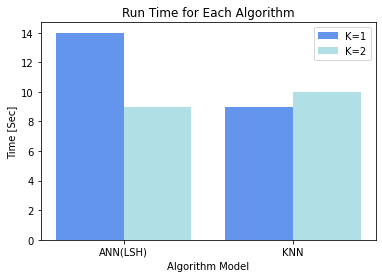

In [29]:
X = ['ANN(LSH)','KNN']
# K, L for ANN are optimal
data1 = {'ann_time':hananya_ann1_time, 'knn_time':hananya_knn1_time}
data2 = {'ann_time':hananya_knn1_time, 'knn_time':hananya_knn2_time}

y1 = list(data1.values())
y2 = list(data2.values())
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'K=1',color='cornflowerblue')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'K=2',color='powderblue')

plt.xticks(X_axis, X)
plt.xlabel("Algorithm Model")
plt.ylabel("Time [Sec]")
plt.title("Run Time for Each Algorithm")
plt.legend()
plt.show()

### Hashmal

In [30]:
# Hashmal, receive results for visualization
ann_hashmal_k1 = ann(hashmal1,1,K,L)
ann_hashmal_k1.fit(ann_hashmal_k1.X,ann_hashmal_k1.y)
ann_hashmal_k1.kneighbors(hashmal2)

ann_hashmal_k2 = ann(hashmal1,2,K,L)
ann_hashmal_k2.fit(ann_hashmal_k2.X,ann_hashmal_k2.y)
ann_hashmal_k2.kneighbors(hashmal2)

knn_hashmal_k1 = knn(hashmal1,hashmal2,1)
knn_hashmal_k1.kneighbors();

knn_hashmal_k2 = knn(hashmal1,hashmal2,2)
knn_hashmal_k2.kneighbors();

hashmal_ann1_time = ann_hashmal_k1.runtime
hashmal_knn1_time = knn_hashmal_k1.runtime
hashmal_ann2_time = ann_hashmal_k2.runtime
hashmal_knn2_time = knn_hashmal_k2.runtime

#### Barplot - Run Time for ANN and KNN Algorithms (K=1, K=2)

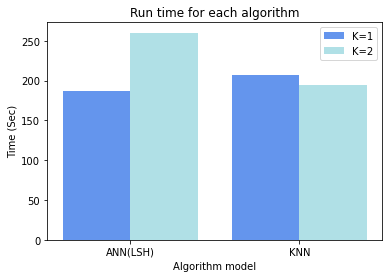

In [31]:
X = ['ANN(LSH)','KNN']
# K, L for ANN are optimal

data1 = {'ann_time':hashmal_ann1_time, 'knn_time':hashmal_knn1_time}
data2 = {'ann_time':hashmal_ann2_time, 'knn_time':hashmal_knn2_time}

y1 = list(data1.values())
y2 = list(data2.values())
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'K=1',color='cornflowerblue')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'K=2',color='powderblue')

plt.xticks(X_axis, X)
plt.xlabel("Algorithm model")
plt.ylabel("Time (Sec)")
plt.title("Run time for each algorithm")
plt.legend()
plt.show()

**Conclusion**
<br>We can see that the results for KNN are similar for both datasets, more number of neighbours we want to find - more running time we need. 
However, for LSH we receive different behavior, if we compare LSH running times of Hashmal and Hananya. Hashmal dataset is much more larger, so it takes more time for more neighbors. 

## 6b. Accuracy Visualization

### Hananya
#### LSH Accuracy by number of cuts K and number of tables L

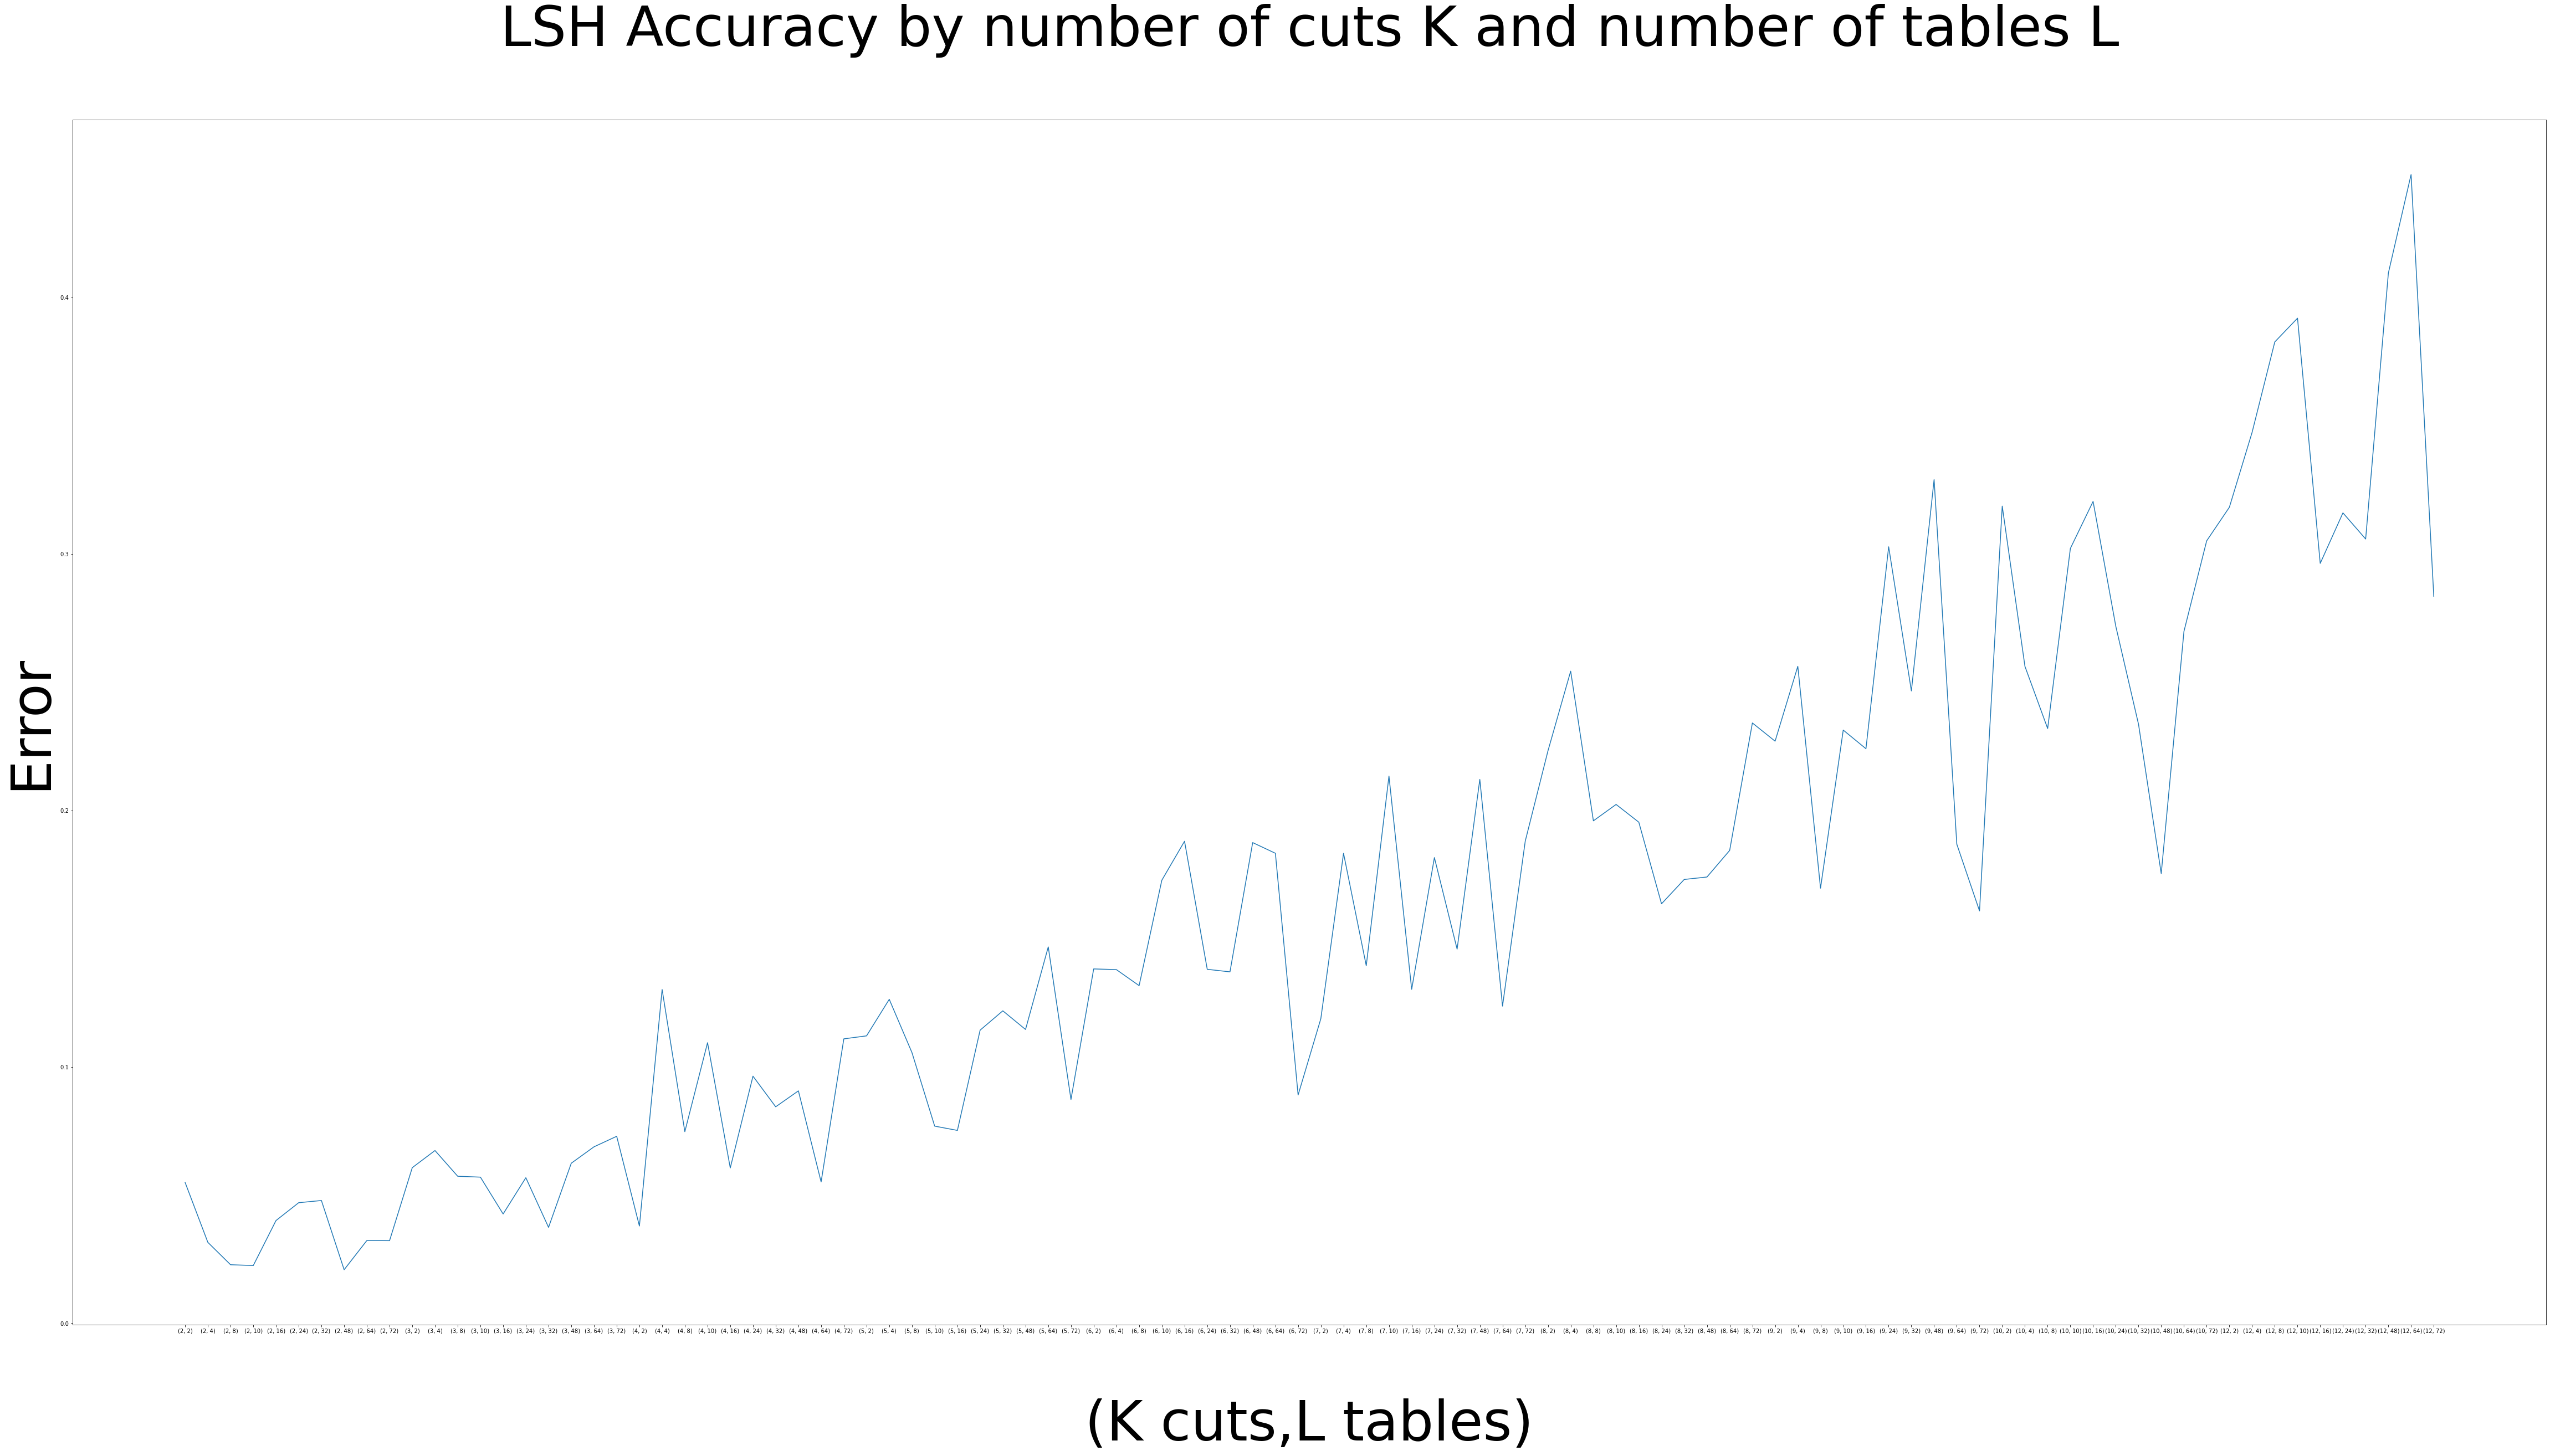

In [32]:
# open JSON file with data received from grid search run
with open('Hananya_gridSearch.json') as user_file:
    file_contents=user_file.read()
data = json.loads(file_contents)

y = []
x = list(data.keys())
for item in data:
    err = data[item]['error']
    y.append(err)
plt.figure(figsize=(80,40))
plt.plot(x,y)
plt.title('LSH Accuracy by number of cuts K and number of tables L\n',fontsize=100)
plt.xlabel('\n(K cuts,L tables)',fontsize=100)
plt.ylabel('Error',fontsize=100)
plt.show()

We can see that as the number of cuts K increases within the pairs, the error increases as well. For better understanding and analyses of results we will display a few more graphs.

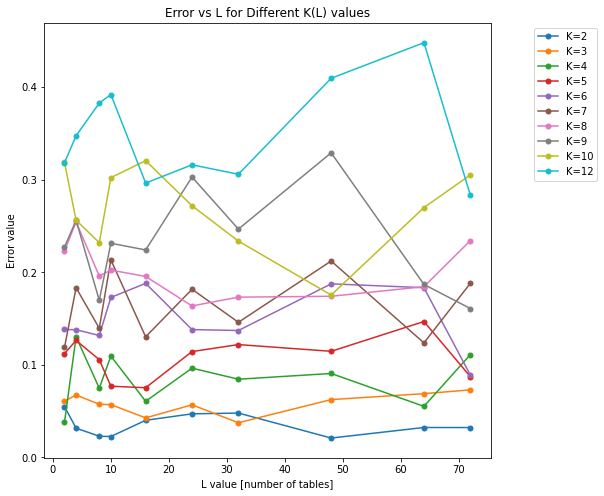

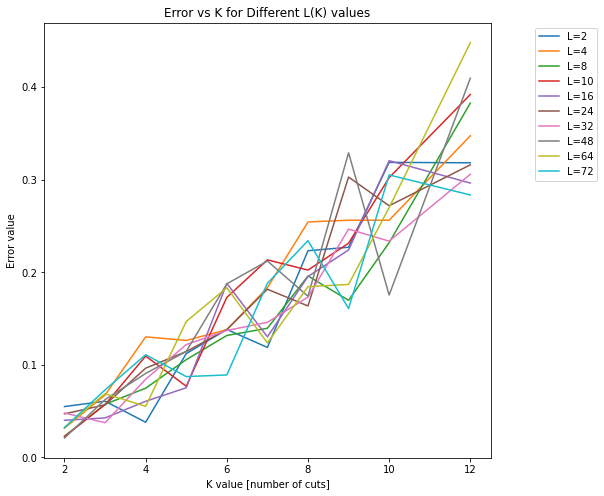

<Figure size 576x576 with 0 Axes>

In [33]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['error'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Error vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['error'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Error vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))

plt.show()



**K effect on Error:**<br>
On the first graph 'Error vs L for Different K(L) values' we can see that for K=2 and any value of L we receive lower errors, with an increase of K the error tends to increase as well.<br><br>
**L effect on Error:**<br>
On the second graph 'Error vs K for Different L(K) values' we can see that higher values of K results in higher error for any given L line (we can recognize similar behavior of L-graphs). 

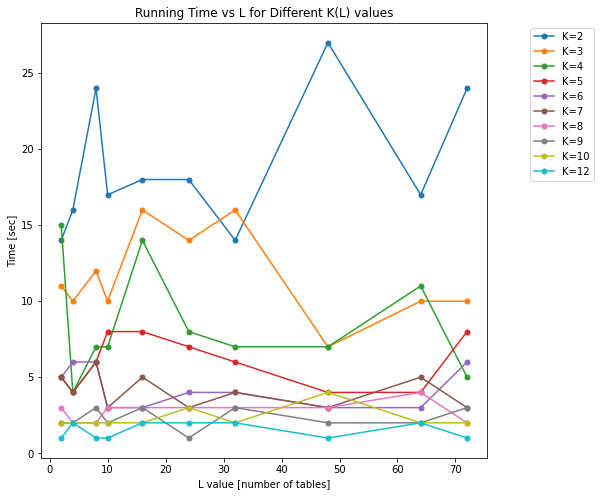

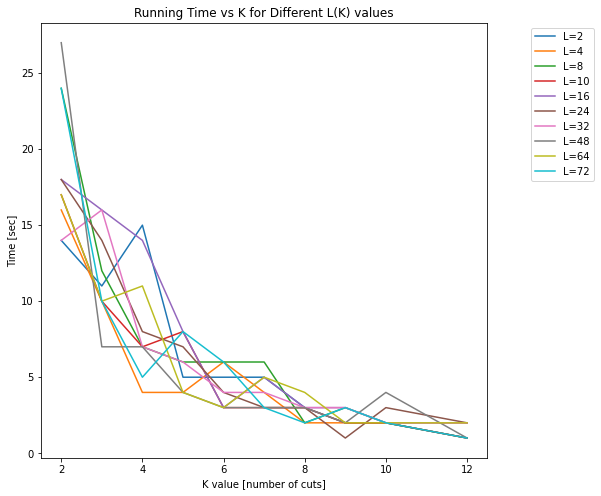

<Figure size 576x576 with 0 Axes>

In [34]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['time run'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Running Time vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['time run'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Running Time vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))

plt.show()


**K effect on Running Time:**<br>
On the first graph 'Running Time vs L for Different K(L) values' we can see that for higher values of K we get lower runnig time.<br><br>
**L effect on  Running Time:**<br>
On the second graph 'Running Time vs K for Different L(K) values' we can see that higher values of L also result in lower running time. 

### Conclusion:
We see that higher values of both K, L result in lower running time. However, higher values of K, L affect error, the error value increases. Therefore, there is a trade-off between accuracy and running time, we need to choose K, L values carefully.
<br>
For given dataset,  in order to get lower value will prefer to choose lower K, L values, K in the range 2-3 and L in the range 8-32 for example, based on the run results.

### Hashmal
#### LSH Accuracy by number of cuts K and number of tables L

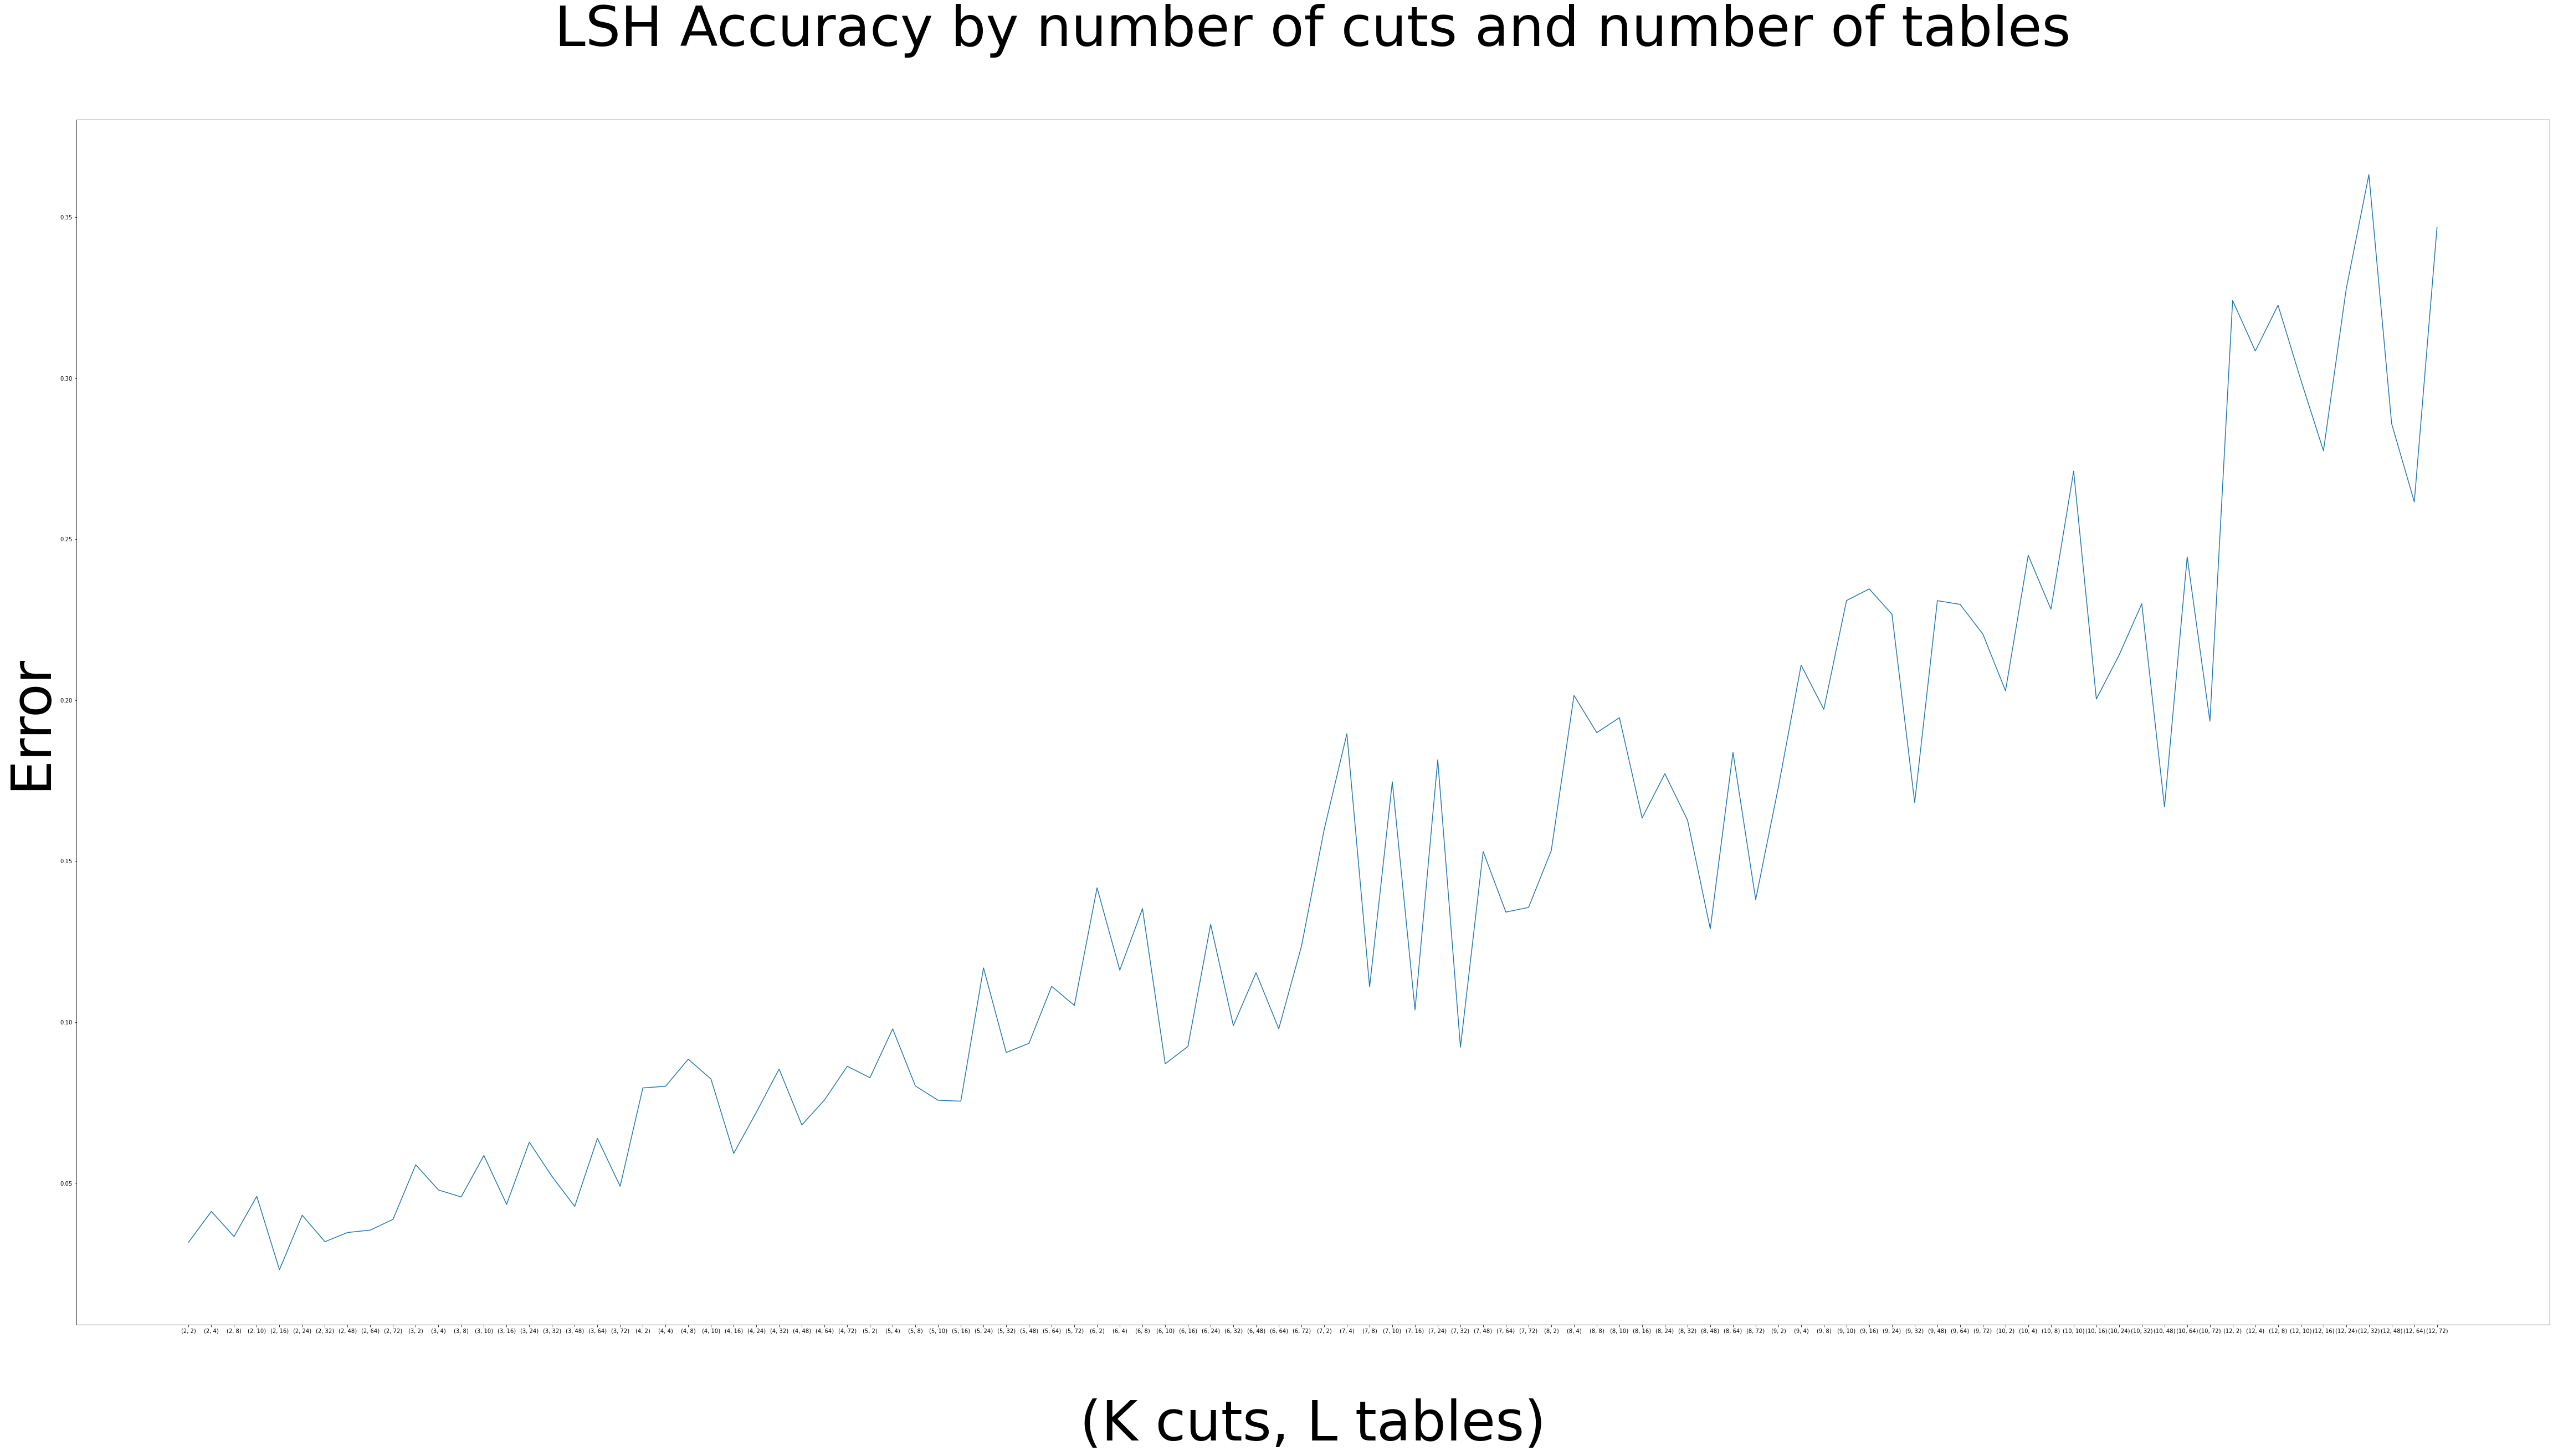

In [35]:
# open JSON file with data received from grid search run
with open('Hashmal_gridSearch.json') as user_file:
    file_contents=user_file.read()
data = json.loads(file_contents)

y = []
x = list(data.keys())
for item in data:
    err = data[item]['error']
    y.append(err)
plt.figure(figsize=(80,40))
plt.plot(x,y)
plt.title('LSH Accuracy by number of cuts and number of tables\n',fontsize=100)
plt.xlabel('\n(K cuts, L tables)',fontsize=100)
plt.ylabel('Error',fontsize=100)
plt.show()

We recieve similar behavior of the graph for Hashmal dataset as for Hananya.

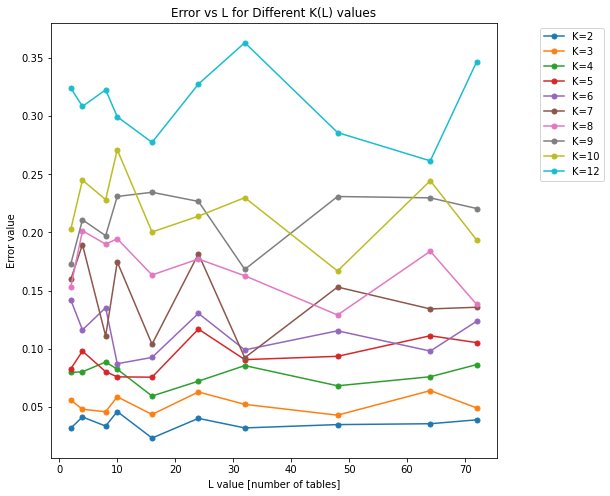

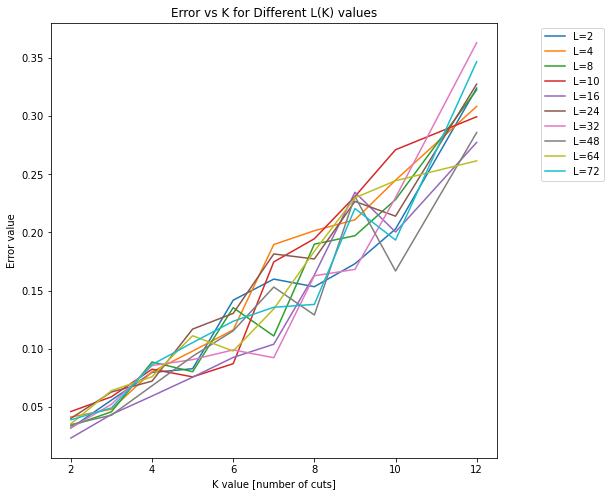

<Figure size 576x576 with 0 Axes>

In [36]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['error'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Error vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['error'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Error vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))
plt.show()


Similar behavior as for Hananya dataset.
<br>
We can see that for K=2 and any value of L we receive lower errors, with an increase of K the error tends to increase as well.Also, higher values of K results in higher error for any given L line. 

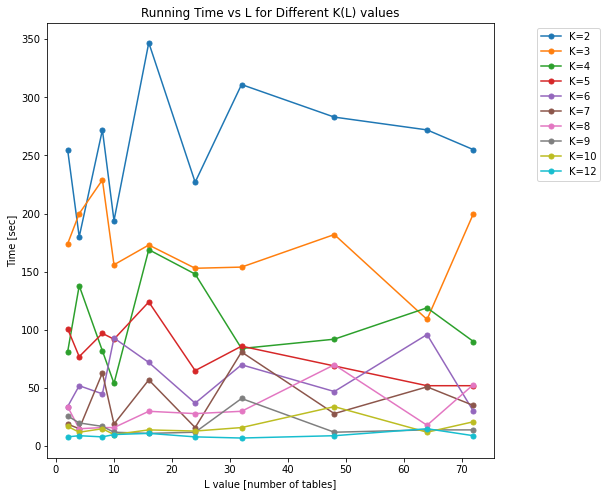

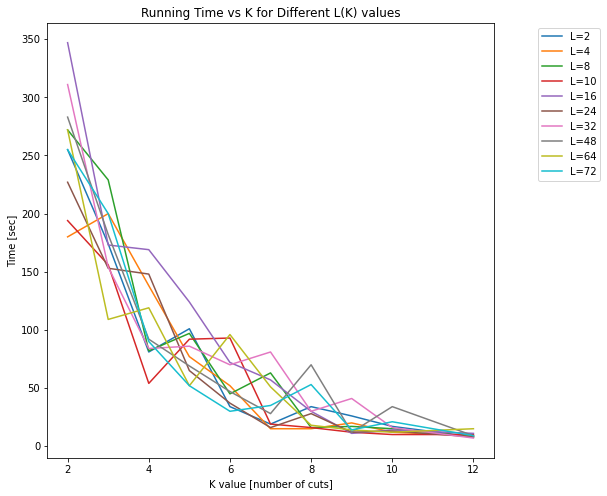

<Figure size 576x576 with 0 Axes>

In [37]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['time run'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Running Time vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['time run'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Running Time vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))

plt.show()


Similar behavior as for Hananya dataset.
<br>
We can see that for higher values of K we get lower runnig time.
Also, the higher values of L also result in lower running time.

### Conclusion
We can see the trend that increasing both values - the number of cuts K and number of tables L,- results in higher error value of the LSH algorithm for given dataset. On order to get lower value will prefer to choose lower K, L values, K in the range 2-3 and L in the range 8-32 for example. 

# 

# Part D

### 6. Compare sklearn library

# 

# Part E

### 6. ANN Classification

In [38]:
class classification:
    def __init__(self,training_set1,training_set2,k_neighbors,K,L):
        self.start = int(round(time.time()))
        if(k_neighbors is None):
            self.k_neighbors = 2
        else:
            self.k_neighbors = k_neighbors
        self.K = K
        self.L = L
        self.bucket = {}
        self.plane_norms = np.random.rand(self.K,128) - .5
        self.training_set = pd.concat([training_set1,training_set2]).reset_index()
        self.training_set.drop(columns='index',inplace=True)
        self.X = self.training_set.iloc[:,4:]
        length1 = len(training_set1)
        length2 = len(training_set2)
        data = [0] * length1 + [1] * length2 
        self.y = pd.DataFrame(data, columns=['target']) 
        self.table = self.contents(self.training_set)
        self.runtime = None
    
    def contents(self,training_set):
        table = {}
        for row in training_set.index:
            y = str(list(training_set.iloc[row,:4]))
            x = training_set.iloc[row,4:]
            table[y] = x
        return table
        
    def fit(self,X,y):
        for row in self.X.index:
            a = np.asarray(self.X.iloc[row,:])
            a_dot = np.dot(a,self.plane_norms.T)
            a_dot = a_dot > 0
            hash_key = list(a_dot.astype(int))
            key = ''
            for bit in hash_key:
                key += str(bit)
            if key not in self.bucket:
                self.bucket[key] = list()
            tuples = (row,self.y.iloc[row]['target'])
            self.bucket[key].append(tuples)
    
    def predict(self,dataset):
        col = ['Sample','Predict Class','Probability']
        indexes = []
        for i in range(len(dataset)):
            indexes.append(i)
            
        predict_df = pd.DataFrame(columns = col,index=indexes)
    
        for row in range(len(dataset)):
            neighbors = self.kneighbors(dataset.iloc[row][:])
            hananya1 = 0
            hashmal1 = 0
            for neighbor in neighbors:
                if(int(neighbor[1]) == 0):
                    hananya1 += 1
                else:
                    hashmal1 += 1

            if(hananya1 > hashmal1):
                predict_df.iloc[row]['Sample'] = list(dataset.iloc[row][:4])
                predict_df.iloc[row]['Predict Class'] = 'Hananya'
                if(hananya1 != 0): 
                    predict_df.iloc[row]['Probability'] = f'{round(hananya1/len(neighbors)*100,2)}%'
                else:
                    predict_df.iloc[row]['Probability'] = '0%'
            else:
                predict_df.iloc[row]['Sample'] = list(dataset.iloc[row][:4])
                predict_df.iloc[row]['Predict Class'] = 'Hashmal'
                if(hashmal1 != 0):
                    predict_df.iloc[row]['Probability'] = f'{round(hashmal1/len(neighbors)*100,2)}%'
                else:
                    predict_df.iloc[row]['Probability'] = '0%'
        return predict_df
    
    def accuracy(self,predict_df,data_classes):    
        # true positive, true negative, false positive, false negative values
        TP = 0 
        TN = 0
        FP = 0
        FN = 0
        
        for row in predict_df.index:
            actual = data_classes[row]
            if(predict_df.iloc[row]['Predict Class'] == 'Hananya'):
                predict = 0
            else:
                predict = 1
                
            if(predict == actual and actual == 0):
                TP += 1
            elif(predict != actual and actual == 1):
                FP += 1
            elif(predict != actual and actual == 0):
                FN += 1
            else:
                TN += 1
        accuracy = float((TP + TN) / (TP + TN + FP + FN))
        recall = float(TP/(TP+FN))
        precision = float(TP/(TP+FP))
        print('Class Accuracy' , accuracy)
        print('Recall' , recall)
        print('Precision' , precision)

            
    def kneighbors(self,dataset):
        k_neighbors_dict = {}
        sample = dataset.iloc[:][4:]
        label = dataset.iloc[:][:4]
        neighbors = []

        #attach hash key to sample
        a = np.asarray(sample)
        a_dot = np.dot(a,self.plane_norms.T)
        a_dot = a_dot > 0
        hash_key = list(a_dot.astype(int))
        sample_key = ''
        for bit in hash_key:
            sample_key += str(bit)
        try:
            neighbors_size = len(self.bucket[sample_key])
        except:
            neighbors_size = 0

        if(neighbors_size < self.k_neighbors):
            another_neighbors = self.complete_neighbors(sample_key, self.k_neighbors - neighbors_size)
            try:
                neighbors = self.bucket[sample_key] + another_neighbors
            except:
                neighbors = another_neighbors
        else:
            neighbors = self.bucket[sample_key]

        end = int(round(time.time()))
        self.runtime = end - self.start
        return neighbors           
    
    def complete_neighbors(self,key, diff):
        key = str(key)
        original_key = key
        neighbors = {}
        index = self.K - 1
        count = 0
        diff_neighbors = []
        
        while(count < diff and index > -1):
            key = original_key
            binary = key[index]
            if(binary == '0'):
                new = list(key)
                new[index] = '1'
                key = ''.join(new)
            else:
                new = list(key)
                new[index] = '0'
                key = ''.join(new)
            if(key in self.bucket.keys()):
                neighbors[key] = list(self.bucket[key])
            try:
                count = count + len(neighbors[key])
            except:
                count = count
            index = index - 1
        count = 0
        for k in neighbors.keys():
            for value in neighbors[k]:
                diff_neighbors.append(value)
                count = count + 1
                if(count == diff):
                    return diff_neighbors
        return diff_neighbors


### Run ANN Classification

In [39]:
# run with K=10. L=8
# two datasets of same length
c = classification(hananya1,hashmal1.iloc[:len(hananya1),:],2,10,8)
c.fit(c.X,c.y)

# create a test set of samples from Hananya2 and Hashmal2
test_set1 = hananya2.iloc[20:40,:]
test_set2 = hashmal2.iloc[100:120,:]
test_set = pd.concat([test_set1,test_set2]).reset_index()
test_set.drop(columns='index',inplace=True)

# receive a df with results
df_predict = c.predict(test_set)

### Predict results for samples

In [40]:
# display result
# display(df_predict)
df_predict

Sample Predict Class Probability
0   [315.29, 369.67, 5.74, -1.743]       Hashmal      64.71%
1    [307.27, 468.04, 6.66, 1.688]       Hashmal      53.57%
2    [306.78, 437.51, 6.05, 1.933]       Hashmal      64.71%
3    [284.98, 345.63, 6.52, 1.447]       Hashmal      81.82%
4   [284.98, 345.63, 6.52, -1.618]       Hananya       65.0%
5   [269.92, 335.67, 5.96, -1.595]       Hashmal      100.0%
6    [234.94, 257.67, 6.83, 1.301]       Hashmal      64.71%
7    [234.94, 257.67, 6.83, 0.523]       Hashmal      53.57%
8    [230.48, 179.06, 7.16, 0.989]       Hananya      66.67%
9     [227.2, 463.36, 6.64, 1.347]       Hashmal      61.11%
10     [200.1, 10.84, 6.31, 1.581]       Hashmal      54.55%
11    [343.3, 298.24, 5.46, 2.046]       Hashmal      64.71%
12   [333.16, 461.21, 5.64, 2.395]       Hashmal      57.14%
13   [328.45, 588.23, 5.05, 2.445]       Hananya       60.0%
14    [299.2, 376.75, 4.87, 1.327]       Hananya       61.8%
15   [299.2, 376.75, 4.87, -1.358]       Hananya      51.72%
16    [300.43, 122.97, 5.4, 1.815]       Hananya       60.0%
17    [287.87, 612.05, 5.1, 2.188]       Hashmal      53.57%
18   [284.23, 402.84, 5.07, 0.512]       Hananya      62.16%
19  [277.93, 230.97, 5.04, -1.668]       Hashmal      64.71%
20   [532.22, 106.17, 7.68, 2.061]       Hananya      64.29%
21     [518.11, 167.69, 8.0, 0.64]       Hashmal      76.19%
22   [493.87, 725.54, 7.19, 0.479]       Hananya      66.67%
23  [487.61, 440.69, 7.49, -2.567]       Hashmal       50.0%
24  [474.41, 102.01, 8.65, -1.939]       Hashmal      76.19%
25   [465.85, 689.71, 7.76, 1.522]       Hashmal      73.21%
26   [465.85, 689.71, 7.76, -3.13]       Hananya       60.0%
27   [460.84, 314.78, 7.9, -1.773]       Hashmal       75.0%
28  [456.71, 400.33, 8.65, -1.841]       Hashmal      76.19%
29   [404.7, 422.84, 7.64, -0.638]       Hashmal      57.14%
30     [356.03, 522.97, 7.08, 0.9]       Hashmal      52.63%
31   [341.76, 239.55, 8.02, 1.731]       Hashmal       90.0%
32   [273.99, 576.64, 9.33, 1.234]       Hashmal       60.0%
33   [259.88, 330.09, 7.94, 1.634]       Hananya       61.8%
34   [256.75, 600.15, 7.83, 1.149]       Hashmal      73.21%
35  [253.83, 656.92, 8.32, -2.022]       Hashmal      54.55%
36  [214.55, 637.64, 7.76, -2.378]       Hashmal      64.71%
37   [208.11, 58.86, 7.35, -2.062]       Hashmal      53.57%
38  [199.77, 558.33, 9.47, -1.492]       Hananya      51.72%
39  [197.38, 182.72, 7.67, -1.225]       Hashmal      57.14%

### Accuracy Calculations

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$
<br>
$$Recall=\frac{TP}{TP+FN}$$
<br>
$$Precision=\frac{TP}{TP+FP}$$

In [41]:
# run accuracy method to receive accuracy, recall and precision results
data_class = [0] * len(test_set1) + [1] * len(test_set2) 
c.accuracy(df_predict,data_class)

Class Accuracy 0.55
Recall 0.35
Precision 0.5833333333333334


## Bonus

### KDTree ANN Class

In [42]:
# ANN class with KD Tree dta structure implementation
class KDTree():
    def __init__(self,dataset,N,L,k_neighbors):
        self.start = int(round(time.time()))
        self.dataset = dataset
        self.depth = 128
        self.axis = self.depth 
        self.k_neighbors = k_neighbors
        self.N = N
        self.L = L
        self.k = k_neighbors
        self.X = dataset.iloc[:,4:]
        self.y = dataset.iloc[:,:4]
        self.table = self.contents_l()
        self.table_f = self.contents_f()
        self.neighbors = []
    
    # this method creates atable with samples' labels
    def contents_l(self):
        table = {}
        for row in self.X.index:
            label = list(self.y.iloc[row,:])
            table[row] = label
        return table
    
    # this method creates atable with samples' features
    def contents_f(self):
        table = {}
        for row in self.X.index:
            label = str(list(self.y.iloc[row,:]))
            table[label] = self.X.iloc[row,:]
        return table

    # this method fits dataset into data structure
    def fit(self,X,y):
        features_ind = []
        for i in range(128):
            features_ind.append(i)
        random.shuffle(features_ind)
        
        median = np.median(X.iloc[:,features_ind[0]])
        root = Node(median)
        points = []
        for row in X.index:
            points.append(row)
        self.kd_tree(root,features_ind,0,points)
        self.tree = root
    
    # finds k neighbours of sample
    def kneighbors(self,dataset):
        rows = len(dataset)
        k_neighbors_dict = {}
        for row in range(rows):
            sample = list(dataset.iloc[row][4:])
            label = str(list(dataset.iloc[row][:4]))
            neighbors = self.tour(sample,self.tree,0)
            labels = []
            for index in neighbors:
                labels.append(self.table[index])
            distances = self.neighbors_distance(sample,labels)
            k_neighbors_dict[label] = distances[:self.k]
        end = int(round(time.time()))
        self.runtime = end - self.start
        return k_neighbors_dict
                
    # returns distances to neighbours          
    def neighbors_distance(self,sample,neighbors):
        distances = {}
        for neighbor in neighbors:
            features = self.table_f[str(neighbor)]
            # find the distance using euclidian distance and norm of the vector
            dis = np.linalg.norm(np.array(sample)-np.array(features))
            distances[str(neighbor)] = dis
        return sorted(distances.items(), key=lambda kv: kv[1]) 
    
    # the method to track path to the sample wiyhin the tree
    def tour(self,sample,node,col):
        if(node is None):
            return
        if(len(node.neighbors)>0):
            return node.neighbors
        feature = sample[col]
        if(feature < node.value):
            neighbors = self.tour(sample,node.left,col+1)
        else:
            neighbors = self.tour(sample,node.right,col+1)
        return neighbors
    
    # the method to build a kd tree
    def kd_tree(self,node,indexes,i,points):
        try:
            ind = indexes[i]
            median = np.median(self.X.iloc[:,ind])
        except:
            return
            
        if(len(points) <= self.N):
            if(len(points) > 0):
                node.neighbors = points
            return
        
        values_of_points = []
        for point in points:
            value = self.X.iloc[point,ind]
            values_of_points.append(value)
        median = np.median(values_of_points)
        
        left_list = []
        right_list = []
        flag = True
        count = 0
        count2 = 0
        
        for point in points:
            if(self.X.iloc[point,ind] < median):
                left_list.append(point)
            elif(self.X.iloc[point,ind] > median):
                right_list.append(point)
            else:
                if(flag):
                    count+= 1
                    left_list.append(point)
                    flag = False
                else:
                    count2+=1
                    right_list.append(point)
                    flag = True
        
        left_val = []
        right_val = []
        for point in left_list:
            left_val.append(self.X.iloc[point,ind])
            
        for point in right_list:
            right_val.append(self.X.iloc[point,ind])
        
        node.left = Node(np.median(left_val))
        node.right = Node(np.median(right_val))
        if(i > 0):
            node.parent = node
        self.kd_tree(node.left,indexes,i+1,left_list)
        self.kd_tree(node.right,indexes,i+1,right_list)
        
    def relating_method(self,neighbors_table):
        dictionary = {}
        for sample in neighbors_table:
            try:
                neighbors = neighbors_table[sample]
                nearest_neighbor = neighbors[0]
                second_nearest_neighbor = neighbors[1]
                dis1 = nearest_neighbor[1]
                dis2 = second_nearest_neighbor[1]
                ratio = dis1 / dis2 
                if(ratio < 0.8):
                    dictionary[sample] = nearest_neighbor
                else:
                    dictionary[sample] = None
            except:
                dictionary[sample] = None
        return dictionary

# define class for Node implementation       
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.neighbors = []

### KDTree Grid Search

In [45]:
def grid_search(dataset1,dataset2,knn_results):
    N = [2,5,10,50,100,200,256,400,512,1000]
    L = [2,4,8,10,16,24,32,48,64,72]
    kneighbors = 1
    min_err = False
    knn_table = knn_results
    N_values = len(knn_table)
    errors = []
    hyperparameters = {}
    for n in N:
        for l in L:
            start = int(round(time.time()))
            kd = KDTree(dataset1,n,l,kneighbors)
            kd.fit(kd.X,kd.y)
            ann_table = kd.kneighbors(dataset2)
            count_none = 0
            sum_dis = 0
            for key in ann_table.keys():
                dknn = knn_table[key][1]
                try:
                    dann = ann_table[key][0][1]
                except:
                    count_none += 1
                    dann = dknn
                sum_dis += (dann / dknn) -1
                
            avg = 0
            if(count_none >0 and count_none < N_values):
                avg = sum_dis / (N_values - count_none)
                avg = avg * count_none
            err = 1/N_values * (sum_dis+avg)
            errors.append(err)
            if(err < min_err or min_err == False):
                min_err = err
                save_l = l
                save_n = n
            end = int(round(time.time()))
            item = {'time run' : end-start, 'error' : err}
            hyperparameters[str((n,l))] = item
            
    # create a JSON file with time stamps and errors  for each pair of hyperparameters
    json_object = json.dumps(hyperparameters, indent=4)
    
    # give the name to JSON according to 1st dataset in the pair -hananya, hashmal or other
    if(len(dataset1) == len(hananya1)):
        with open('Hananya_KDTree_gridSearch.json', "w") as outfile:
            outfile.write(json_object)
    elif(len(dataset1) == len(hashmal1)):
        with open('Hashmal_KDTree_gridSearch.json', "w") as outfile:
            outfile.write(json_object)
    else:
        with open('KDTree_gridSearch.json', "w") as outfile:
            outfile.write(json_object)
    
    display('best L parm - ',save_l)
    display('best N parm - ',save_n)
    display('min err - ', min_err)
    return (save_n,save_l)

In [46]:
grid_res = grid_search(hananya1,hananya2,hananya_knn_results)

TypeError: 'module' object is not callable

In [47]:
N = 1000
L = 10

### Run KDTree with K=2,N Optimal, L Optimal

In [50]:
# for hananya datasets
kd = KDTree(hananya1,N,L,2)
kd.fit(kd.X,kd.y)
hananya_kd_results = kd.kneighbors(hananya2);

In [52]:
hananya_kd_results

{'[193.17, 371.13, 22.83, 1.571]': [('[201.45, 383.78, 15.63, 1.636]',
   124.2014492669067),
  ('[191.63, 281.1, 20.79, 1.545]', 124.39051410778879)],
 '[331.15, 543.32, 18.86, 1.099]': [('[235.13, 331.52, 7.26, 1.358]',
   347.77722754660056),
  ('[215.31, 407.03, 1.53, 2.018]', 351.29047809469586)],
 '[253.43, 525.48, 21.01, 1.512]': [('[207.54, 141.9, 1.27, 1.393]',
   197.56770991232347),
  ('[232.97, 268.08, 1.05, 1.496]', 197.97222027345148)],
 '[236.15, 239.2, 21.35, 1.502]': [('[207.54, 141.9, 1.27, 1.393]',
   149.0570360633808),
  ('[233.44, 277.94, 1.47, 1.569]', 183.47206871891973)],
 '[201.21, 471.74, 19.79, 1.411]': [('[201.5, 41.66, 1.2, 1.451]',
   117.81341180018512),
  ('[202.32, 132.83, 1.7, 1.335]', 126.74383614203887)],
 '[337.09, 417.0, 11.87, 2.015]': [('[228.83, 546.87, 2.49, 1.848]',
   239.00627606822377),
  ('[219.55, 484.12, 4.69, 1.681]', 295.5689428881187)],
 '[225.51, 328.02, 13.1, 1.395]': [('[251.53, 491.94, 20.21, 1.439]',
   197.40820651634522),
  ('

In [53]:
# for hananya datasets
hananya_ann_neighbors = hananya_kd.relating_method(hananya_kd_results)

In [ ]:
# receive two images with markings for hananya datasets
hananya_img1,hananya_img2 = images('Hananya1.jpg','Hananya2.jpg',hananya_ann_neighbors)

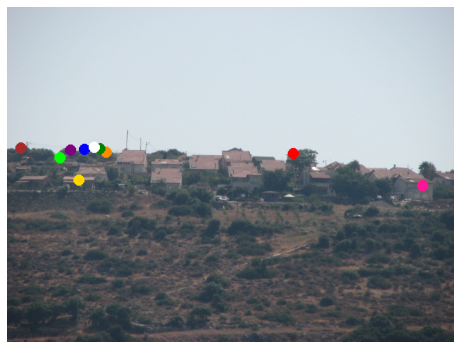

In [60]:
# display first image Hananya1 with markings
# display(hananya_img1)
plt.figure(figsize=(8, 8))
plt.imshow(hananya_img1)
plt.axis('off')
plt.show()


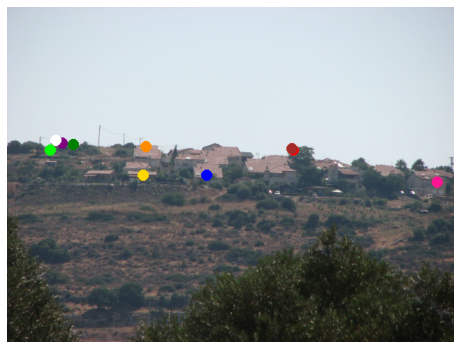

In [61]:
plt.figure(figsize=(8, 8))
plt.imshow(hananya_img2)
plt.axis('off')
plt.show()

In [62]:
# Hananya, receive results for visualization
ann_hananya_k1 = KDTree(hananya1,N,L,1)
ann_hananya_k1.fit(ann_hananya_k1.X,ann_hananya_k1.y)
ann_hananya_k1.kneighbors(hananya2)

ann_hananya_k2 = KDTree(hananya1,N,L,2)
ann_hananya_k2.fit(ann_hananya_k2.X,ann_hananya_k2.y)
ann_hananya_k2.kneighbors(hananya2)

knn_hananya_k1 = knn(hananya1,hananya2,1)
knn_hananya_k1.kneighbors();

knn_hananya_k2 = knn(hananya1,hananya2,2)
knn_hananya_k2.kneighbors();

hananya_ann1_time = ann_hananya_k1.runtime
hananya_knn1_time = knn_hananya_k1.runtime
hananya_ann2_time = ann_hananya_k2.runtime
hananya_knn2_time = knn_hananya_k2.runtime

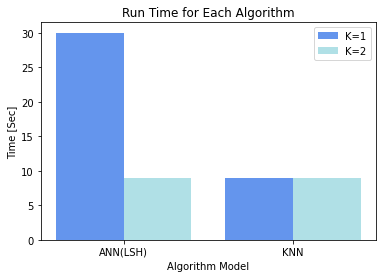

In [63]:
X = ['ANN(LSH)','KNN']
# K, L for ANN are optimal
data1 = {'ann_time':hananya_ann1_time, 'knn_time':hananya_knn1_time}
data2 = {'ann_time':hananya_knn1_time, 'knn_time':hananya_knn2_time}

y1 = list(data1.values())
y2 = list(data2.values())
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'K=1',color='cornflowerblue')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'K=2',color='powderblue')

plt.xticks(X_axis, X)
plt.xlabel("Algorithm Model")
plt.ylabel("Time [Sec]")
plt.title("Run Time for Each Algorithm")
plt.legend()
plt.show()

In [64]:
# open JSON file with data received from grid search run
with open('KDTree_gridSearch.json') as user_file:
    file_contents=user_file.read()
data = json.loads(file_contents)

y = []
x = list(data.keys())
for item in data:
    err = data[item]['error']
    y.append(err)
plt.figure(figsize=(80,40))
plt.plot(x,y)
plt.title('LSH Accuracy by number of cuts K and number of tables L\n',fontsize=100)
plt.xlabel('\n(K cuts,L tables)',fontsize=100)
plt.ylabel('Error',fontsize=100)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'KDTree_gridSearch.json'

In [ ]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['error'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Error vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['error'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Error vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Error value')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))

plt.show()

In [ ]:
# create first plot with size (8, 8)
plt.figure(figsize=(8, 8))

# group data by K
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if k not in grouped_data:
        grouped_data[k] = {'x': [], 'y': []}
    grouped_data[k]['x'].append(l)
    grouped_data[k]['y'].append(value['time run'])

# plot each group with different color and legend
for k, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', marker='o', markersize=5, label=f'K={k}')

plt.title('Running Time vs L for Different K(L) values')
plt.xlabel('L value [number of tables]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# create second plot with same size as first plot
plt.figure(figsize=(8, 8))

# group data by L
grouped_data = {}
for key, value in data.items():
    k, l = map(int, key.strip('()').split(','))
    if l not in grouped_data:
        grouped_data[l] = {'x': [], 'y': []}
    grouped_data[l]['x'].append(k)
    grouped_data[l]['y'].append(value['time run'])

# plot each group with different color and legend
for l, group in grouped_data.items():
    plt.plot(group['x'], group['y'], linestyle='-', label=f'L={l}')

plt.title('Running Time vs K for Different L(K) values')
plt.xlabel('K value [number of cuts]')
plt.ylabel('Time [sec]')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(8, 8))

plt.show()
